# Demonstration of linear Kalman filter


This notebook demonstrates the use of a linear Kalman filter to recover the underling state evolution of a pulsar frequency timeseries.

It also discusses the use of likelihood methods for parameter estimation

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
try:
    sys.path.remove("../py_src") # Hacky way to add higher directory to python modules path. 
except:
    pass
sys.path.append("../py_src") # Means that I dont have to make src/ a proper python package

## 1. Single run example - true parameters


We can generate some synthetic data, and run the Kalman filter to see how well we recover the state.

The Kalman filter depends on a series of physical parameters (e.g. GW angular frequency). 

Lets assume we know these perfectly, and see how the filter does.

In [29]:
from system_parameters import SystemParameters
from pulsars import Pulsars
from gravitational_waves import GWs
from synthetic_data import SyntheticData
from plotting import plot_statespace,plot_all
from model import LinearModel
from kalman_filter import KalmanFilter
from bilby_wrapper import BilbySampler
from priors import priors_dict,bilby_priors_dict,erroneous_priors_dict

The number of pulsars is:  2
Model likelihood is:  -20325732049.28658


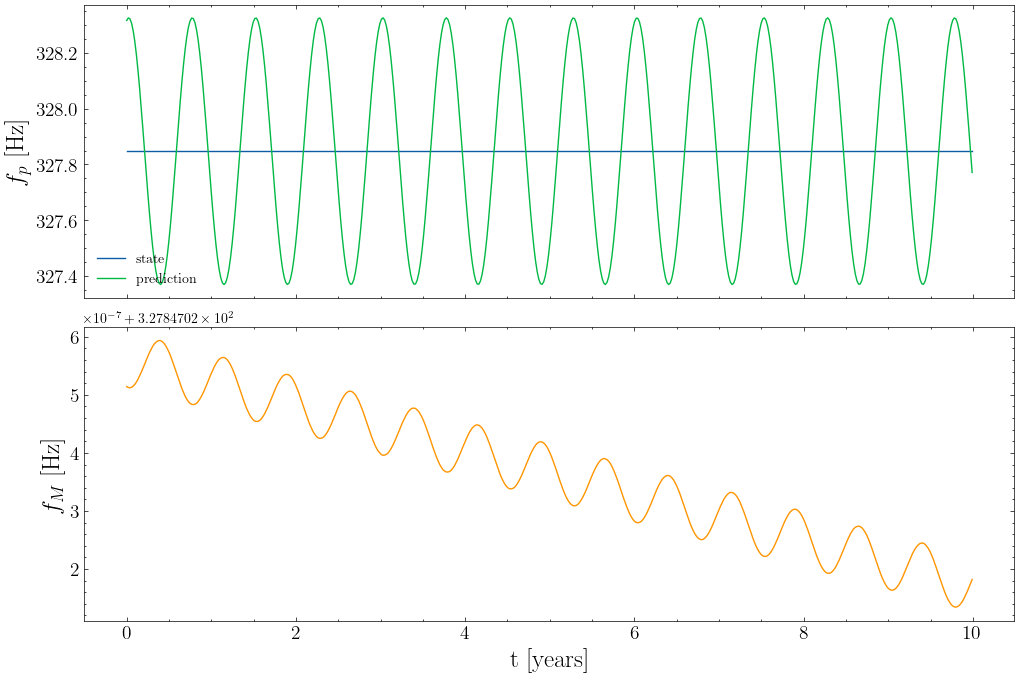

In [60]:
P   = SystemParameters()       # define the system parameters as a class
PTA = Pulsars(P)               # setup the PTA
GW  = GWs(P)                   # setup GW related constants and functions. This is a dict, not a class, for interaction later with Bilby 
data = SyntheticData(PTA,GW,1) # generate some synthetic data


#Define the model 
model = LinearModel

#Initialise the Kalman filter
KF = KalmanFilter(model,data.f_measured,PTA)

# Run the KF once with the correct parameters
true_parameters = priors_dict(PTA,GW)
fudged_parameters = erroneous_priors_dict(PTA,GW,0.999999999999)
fudged_parameters["h"] = 1e-3
model_likelihood,model_predictions = KF.likelihood_and_states(fudged_parameters)
print("Model likelihood is: ", model_likelihood)
plot_all(PTA.t,data.intrinsic_frequency,data.f_measured,model_predictions,psr_index =0)

In [56]:
true_parameters

{'omega_gw': 5e-07,
 'phi0_gw': 0.2,
 'psi_gw': 2.5,
 'iota_gw': 1.0,
 'delta_gw': 1.0,
 'alpha_gw': 1.0,
 'h': 1e-10,
 'f00': 327.8470205611185,
 'f01': 205.53069910059,
 'fdot0': -1.227834e-15,
 'fdot1': -4.297e-16,
 'distance0': 181816860005.41092,
 'distance1': 32362224272.807774,
 'gamma0': 1e-13,
 'gamma1': 1e-13,
 'sigma_p': 1e-08,
 'sigma_m': 1e-10}

In [57]:
fudged_parameters

{'omega_gw': 5e-07,
 'phi0_gw': 0.2,
 'psi_gw': 2.5,
 'iota_gw': 1.0,
 'delta_gw': 1.0,
 'alpha_gw': 1.0,
 'h': 1e-10,
 'f00': 295.87849469312783,
 'f01': 316.49018798588816,
 'fdot0': -1.0466191698347177e-15,
 'fdot1': -7.905301443736054e-16,
 'distance0': 181816860005.41092,
 'distance1': 32362224272.807774,
 'gamma0': 1.0388836047354697e-13,
 'gamma1': 1.9364988781892823e-13,
 'sigma_p': 1e-08,
 'sigma_m': 1e-10}

In [22]:
true_parameters = priors_dict(PTA,GW)
true_parameters_1 = erroneous_priors_dict(PTA,GW,0.05)

In [28]:
for key,item in true_parameters_1.items():
    print(key,item, true_parameters[key])

omega_gw 5e-07 5e-07
phi0_gw 0.2 0.2
psi_gw 2.5 2.5
iota_gw 1.0 1.0
delta_gw 1.0 1.0
alpha_gw 1.0 1.0
h 0.01 0.01
f00 327.8470205611185 327.8470205611185
f01 205.53069910059 205.53069910059
f02 303.0909794113198 303.0909794113198
f03 326.600561967271 326.600561967271
f04 348.5592316999902 348.5592316999902
f05 112.94972319066429 112.94972319066429
f06 346.5319964932129 346.5319964932129
f07 215.6088104676294 215.6088104676294
f08 190.2678373613727 190.2678373613727
f09 193.7156834116254 193.7156834116254
f010 238.004053174088 238.004053174088
f011 172.642909924795 172.642909924795
f012 125.2002451675204 125.2002451675204
f013 277.9377069492822 277.9377069492822
f014 317.3789419337929 317.3789419337929
f015 316.12398422451724 316.12398422451724
f016 216.3733370950632 216.3733370950632
f017 218.811840394717 218.811840394717
f018 170.93736991146392 170.93736991146392
f019 266.8691669720664 266.8691669720664
f020 245.4261196602377 245.4261196602377
f021 607.6775384652 607.6775384652
f022 3

In [10]:
tol = 0.05
random.uniform(1.0-0.05, 1.0)

0.9741792580507298